In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas

#import preprocesamiento #los metodos de preprocesamiento.py reciben datos en la forma: data.values donde data
                        #es producto de leer csv con pandas.read_csv
import torch as tr

class BOW():
    def __init__(self,dataset,strip_accents,stoplist,weighting,ngram = None):
        #autocorregir -> lematizar -> borrar signos, carac especiales, stopwords, pasar a minuscula
        #x_text_auto = preprocesamiento.Autocorrector(dataset.values)
        #x_text_lem = preprocesamiento.Lematizar(dataset)
        #x_text_lem = x_text_lem[:,1]
        #x_text_lem = dataset[:,1] esto anda
        if weighting:
            if ngram: 
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram) 
            else:
                vectorizer = TfidfVectorizer(strip_accents=strip_accents,stop_words=stoplist)   
        else:
            if ngram:
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist,ngram_range=ngram)     
            else: 
                vectorizer = CountVectorizer(strip_accents=strip_accents,stop_words=stoplist)
        #X = vectorizer.fit_transform(x_text_lem)  
        X = vectorizer.fit_transform(dataset)
        self.vectorizer = vectorizer
        self.X = X

    def get_vocab(self):
        return(self.vectorizer.get_feature_names())

    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import math
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import torch
from sklearn.metrics import balanced_accuracy_score
from mpl_toolkits import mplot3d
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC,SVC

In [0]:
correctedData = pd.read_csv("preprocessedQuestions_stem_completadas.csv",delimiter=',',header=None) #comentar esta linea en caso de descomentar la anterior
print("Shape de corrected data: ",correctedData.shape)
cantidad_labels = correctedData.values[len(correctedData.values)-1,0] + 1
cantidad_preg = correctedData.shape[0]
print("Cantidad de clases: ",cantidad_labels)
print("Cantidad de patrones: ",cantidad_preg)
correctedData = correctedData.values

stoplist = stopwords.words('spanish')
text = correctedData[:,1]
bow_unigram = BOW(text,'ascii',stoplist,weighting=True)

Y = np.zeros((cantidad_preg),dtype=np.int64)
for i in range(cantidad_preg):
    Y[i] = correctedData[i,0]
Y = torch.from_numpy(Y)

Shape de corrected data:  (1527, 2)
Cantidad de clases:  106
Cantidad de patrones:  1527


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuvier

In [0]:
parameters = {
    'C': [5, 1, 10, 20],  
    'gamma': [0.3, 0.1, 0.01], 
    'kernel': ['rbf'],
    'max_iter': [20,50,100,150,200]
}

In [0]:
net = SVC()
candidatos = 50

gs = RandomizedSearchCV(net,parameters,verbose=2,n_jobs=-1,cv=10,scoring='balanced_accuracy',n_iter=candidatos)
Y_numpy = Y.numpy()
X_train,X_test,y_train,y_test = train_test_split(bow_unigram.X,Y_numpy,shuffle=True,stratify=Y_numpy,test_size=0.1,random_state=12)
gs.fit(X_train,y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver ter

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [5, 1, 10, 20],
                                        'gamma': [0.3, 0.1, 0.01],
                                        'kernel': ['rbf'],
                                        'max_iter': [20, 50, 100, 150, 200]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='balanced_accuracy',
                   verbose=2)

In [0]:
C = []
gamma = []
kernel = []
max_epochs = []
score = []
std=[]

y_test_tensor = torch.LongTensor(y_test)
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            score.append(results['mean_test_score'][candidate])
            std.append(results['std_test_score'][candidate])
            C.append(results['params'][candidate]['C'])
            gamma.append(results['params'][candidate]['gamma'])
            kernel.append(results['params'][candidate]['kernel'])
            max_epochs.append(results['params'][candidate]['max_iter'])

report(gs.cv_results_,candidatos)  

print("Score: ",score)
print("std: ",std)
print("C: ",C)
print("gamma: ",gamma)
print("max_epochs: ",max_epochs)

Model with rank: 1
Mean validation score: 0.757 (std: 0.032)
Parameters: {'max_iter': 50, 'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

Model with rank: 1
Mean validation score: 0.757 (std: 0.032)
Parameters: {'max_iter': 200, 'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

Model with rank: 1
Mean validation score: 0.757 (std: 0.032)
Parameters: {'max_iter': 100, 'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

Model with rank: 4
Mean validation score: 0.752 (std: 0.030)
Parameters: {'max_iter': 20, 'kernel': 'rbf', 'gamma': 0.3, 'C': 5}

Model with rank: 5
Mean validation score: 0.751 (std: 0.034)
Parameters: {'max_iter': 100, 'kernel': 'rbf', 'gamma': 0.3, 'C': 20}

Model with rank: 5
Mean validation score: 0.751 (std: 0.034)
Parameters: {'max_iter': 50, 'kernel': 'rbf', 'gamma': 0.3, 'C': 20}

Model with rank: 5
Mean validation score: 0.751 (std: 0.034)
Parameters: {'max_iter': 150, 'kernel': 'rbf', 'gamma': 0.3, 'C': 20}

Model with rank: 5
Mean validation score: 0.751 (std: 0.034)
Parameters: {'max_i

'\nprobs = gs.best_estimator_.predict(X_test)\n#print(probs.shape)\n\n# get training and validation loss\n#epochs = [i for i in range(len(gs.best_estimator_.history))]\nepochs = [i for i in range(max_epochs[0])]\n#train_loss = gs.best_estimator_.history[:,\'train_loss\']\n\n#valid_loss = gs.best_estimator_.history[:,\'valid_loss\']\nacc = balanced_accuracy_score(y_test_tensor,probs)\nprint("tasa de acierto obtenida: ",acc)\n'

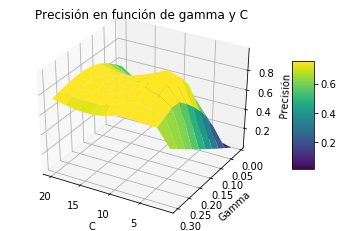

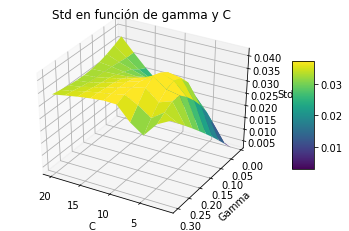

In [0]:
"""
ejex = gamma 
ejey = max_epochs
ejez = score

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,40)
ax.set_xlabel('Gamma')
ax.set_ylabel('Epocas')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de gamma y cantidad de épocas')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_Gamma_Epocas_Precision.svg")
#/////////////////////////////
#////////////////////////////

ejex = gamma
ejey = max_epochs
ejez = std

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,40)
ax.set_xlabel('Gamma')
ax.set_ylabel('Epocas')
ax.set_zlabel('Std')
ax.set_title('Std en función de gamma y cantidad de épocas')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_Gamma_Epocas_STD.svg")
#/////////////////////////////
#////////////////////////////

ejex = C
ejey = max_epochs
ejez = score

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,120)
ax.set_xlabel('C')
ax.set_ylabel('Epocas')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de C y cantidad de épocas')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_C_Epocas_Precision.svg")

#/////////////////////////////
#////////////////////////////

ejex = C
ejey = max_epochs
ejez = std

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,120)
ax.set_xlabel('C')
ax.set_ylabel('Epocas')
ax.set_zlabel('Std')
ax.set_title('Std en función de C y cantidad de épocas')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_C_epocas_STD.svg")

#/////////////////////////////
#////////////////////////////

"""
score=  [0.7568099841622953, 0.7568099841622953, 0.7568099841622953, 0.7518823738882827, 0.7510215011274345, 0.7510215011274345, 0.7510215011274345, 0.7510215011274345, 0.7506338958642422, 0.7506281741501083, 0.7506281741501083, 0.7506281741501083, 0.7502356645605153, 0.7502356645605153, 0.7497630509730464, 0.7492779897380941, 0.7492779897380941, 0.7492779897380941, 0.7492779897380941, 0.7465051770069485, 0.7338722394013769, 0.7338722394013769, 0.7338722394013769, 0.7311435188999662, 0.5757984897290328, 0.5756267682432068, 0.5756267682432068, 0.5756267682432068, 0.5691864768757741, 0.5691864768757741, 0.5691864768757741, 0.5691864768757741, 0.5687676474011647, 0.23191394186962636, 0.23066431950275923, 0.23066431950275923, 0.23066431950275923, 0.23066431950275923, 0.1771133956864721, 0.17671516438274523, 0.17671516438274523, 0.17671516438274523, 0.03135356886430934, 0.026966228528158404, 0.026966228528158404, 0.026966228528158404, 0.015228774215461913, 0.010432903490142864, 0.010432903490142864, 0.010432903490142864]
std=  [0.03196878306436585, 0.03196878306436585, 0.03196878306436585, 0.030119747794129955, 0.034063434663722976, 0.034063434663722976, 0.034063434663722976, 0.034063434663722976, 0.033488197491761566, 0.027876649123619097, 0.027876649123619097, 0.027876649123619097, 0.0332964939687, 0.0332964939687, 0.027735978166933628, 0.03728491784611755, 0.03728491784611755, 0.03728491784611755, 0.03728491784611755, 0.031881299639990014, 0.03249675408258008, 0.03249675408258008, 0.03249675408258008, 0.03212384785320863, 0.03623085913479152, 0.036173257816590934, 0.036173257816590934, 0.036173257816590934, 0.03723722684362137, 0.03723722684362137, 0.03723722684362137, 0.03723722684362137, 0.03658087964864567, 0.018644530930460514, 0.016678865345869685, 0.016678865345869685, 0.016678865345869685, 0.016678865345869685, 0.014585503281190857, 0.014061692729882573, 0.014061692729882573, 0.014061692729882573, 0.006001115497771406, 0.004766131834782208, 0.004766131834782208, 0.004766131834782208, 0.004729439215882906, 0.0028144382266493792, 0.0028144382266493792, 0.0028144382266493792]
C=  [10, 10, 10, 5, 20, 20, 20, 20, 20, 5, 5, 5, 20, 20, 5, 10, 10, 10, 10, 20, 5, 5, 5, 5, 1, 1, 1, 1, 20, 20, 20, 20, 20, 10, 10, 10, 10, 10, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1]
gamma=  [0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.1, 0.3, 0.3, 0.3, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
max_epochs=  [50, 200, 100, 20, 100, 50, 150, 200, 50, 150, 100, 200, 100, 150, 50, 150, 200, 100, 50, 20, 150, 200, 100, 20, 20, 100, 200, 150, 200, 50, 100, 150, 20, 20, 150, 100, 50, 200, 20, 100, 150, 200, 20, 100, 150, 50, 20, 200, 150, 50]
import numpy as np
ejex = C
ejey = gamma
ejez = score

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,120)
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Precisión')
ax.set_title('Precisión en función de gamma y C')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_Gamma_C_Precision.svg")

ejex = C
ejey = gamma
ejez = std

plotx,ploty, = np.meshgrid(np.linspace(np.min(ejex),np.max(ejex),10),\
                           np.linspace(np.min(ejey),np.max(ejey),10))
plotz = interp.griddata((ejex,ejey),ejez,(plotx,ploty),method='cubic')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35,120)
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Std')
ax.set_title('Std en función de gamma y C')

surf = ax.plot_surface(plotx,ploty,plotz,vmin=np.nanmin(ejez),vmax = np.nanmax(ejez),cstride=1,rstride=1,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig("prueba7_Gamma_C_std.svg")
"""
probs = gs.best_estimator_.predict(X_test)
#print(probs.shape)

# get training and validation loss
#epochs = [i for i in range(len(gs.best_estimator_.history))]
epochs = [i for i in range(max_epochs[0])]
#train_loss = gs.best_estimator_.history[:,'train_loss']

#valid_loss = gs.best_estimator_.history[:,'valid_loss']
acc = balanced_accuracy_score(y_test_tensor,probs)
print("tasa de acierto obtenida: ",acc)
"""